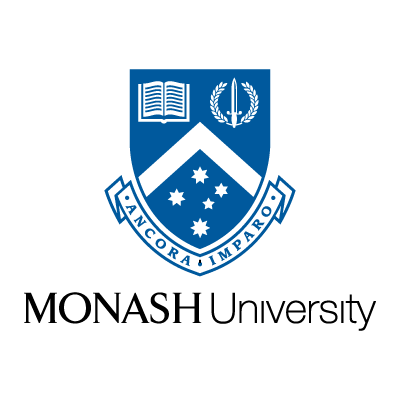

# FIT5196 Assessment 3
#### Student Name: Nisheeth Shah
#### Student ID: 29599644

Date: 26/10/2018

Environment: Python 3.x and Jupyter notebook

## Task 1: Data Integration

### Import of libraries required in this whole assignment

In [1]:
import json
import pprint
import pandas as pd
import numpy as np
import xml.etree.ElementTree as et
from IPython.display import display_html
import codecs
from bs4 import BeautifulSoup
import requests
from math import radians, cos, sin, asin, sqrt,atan2
%matplotlib inline
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from shapely.geometry import Polygon,Point
from sklearn import preprocessing
import math
import datetime
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

C:\Users\Nisheeth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Reading all the files one by one

Reading hospitals JSON file and display first few rows

In [2]:
with open('hospitals.json') as hospital_json_file:
    hospital_json_data = json.load(hospital_json_file)

# list of columns
cols = ["id", "lat", "lng", "name"]
# New df with above columns and read data from JSON
hospital_json_df  = pd.DataFrame(hospital_json_data, columns = cols)

hospital_json_df.head(10)

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital
5,hospital_006,-36.359274,145.410832,Shepparton Private Hospital
6,hospital_007,-37.774573,144.923973,Ascot Vale Road Specialist Rooms
7,hospital_008,-37.849467,145.226801,Knox Private Hospital
8,hospital_009,-37.869801,145.003096,Masada Private Hospital
9,hospital_010,-37.810454,145.194100,Mitcham Private Hospital


Reading hospitals JSON file and display first few rows

In [3]:
with open('real_state.json') as real_state_json_file:
    real_state_json_data = json.load(real_state_json_file)

cols = ["property_id", "lat", "lng", "addr_street", "price", "property_type", "year", "bedrooms", "bathrooms", "parking_space"]
real_state_json_df  = pd.DataFrame(real_state_json_data, columns = cols)

real_state_json_df.head(10)

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,66098.0,-37.787341,145.317041,252 Hull Road,5894000.0,house,2014.0,3.0,1.0,1.0
1,30941.0,-37.757009,144.986778,21 Newman Street,10439000.0,house,2010.0,3.0,1.0,1.0
2,62128.0,-37.792650,145.249734,6 Adele Court,7089000.0,house,2012.0,3.0,1.0,1.0
3,61728.0,-37.775214,145.256363,3 Kelly Court,8160000.0,house,2013.0,5.0,2.0,2.0
4,3646.0,-37.810686,144.891042,5/8 Tongue Street,6300000.0,house,2011.0,2.0,1.0,1.0
5,51335.0,-37.777213,145.109253,37 Timber Ridge,16592000.0,house,2015.0,4.0,1.0,0.0
6,5167.0,-37.867356,144.819074,37A Rose Street,8800000.0,house,2011.0,3.0,2.0,1.0
7,781.0,-37.795468,144.887766,29 Adelaide Street,7550000.0,house,2012.0,3.0,1.0,2.0
8,35049.0,-37.727840,145.031006,49 Nisbett Street,5841000.0,house,2007.0,3.0,1.0,2.0
9,64897.0,-37.807913,145.271955,8 Ronald Road,11050000.0,house,2016.0,2.0,1.0,3.0


Reading Realstate XML file and display first few rows

In [4]:
# Define columns of df in list and define a blank df
cols = ["bathrooms", "price", "bedrooms", "parking_space", "year", "lat", "lng", "property_type", "addr_street", "property_id"]
real_state_xml_df = pd.DataFrame(columns=cols)

# Read XML file through ET library and take all data using "*" wildcard character
root = et.parse('real_state.xml')
rows = root.findall('*')

# Store each line from the read data as elements in list
line_list = []
for each_line in rows:
    temp = []
    for val in each_line:
        temp.append(val.text)
    line_list.append(temp)

# Store list data in df
for idx, val in enumerate(cols):
    real_state_xml_df[val] = line_list[idx]
    
# Put blank for NAs in df
real_state_xml_df = real_state_xml_df.fillna('')

# Change the datatype of few columns to numeric and show first few rows
real_state_xml_df[["bathrooms", "price", "bedrooms", "parking_space", "year", "lat", "lng", "property_id"]] = real_state_xml_df[["bathrooms", "price", "bedrooms", "parking_space", "year", "lat", "lng", "property_id"]].astype(float)
real_state_xml_df.head(10)


,bathrooms,price,bedrooms,parking_space,year,lat,lng,property_type,addr_street,property_id
0,2.0,3540000.0,3.0,0.0,2009.0,-37.886416,144.757690,house,4 Simpson Way,9074.0
1,2.0,9000000.0,3.0,1.0,2016.0,-37.696042,145.131340,house,14 Sun Orchid Circuit,44284.0
2,1.0,7361000.0,3.0,2.0,2013.0,-37.855244,145.241706,house,57 Chartwell Drive,71668.0
3,1.0,4408000.0,3.0,2.0,2012.0,-37.733765,145.018688,house,66 Malpas Street,33085.0
4,1.0,7800000.0,3.0,1.0,2015.0,-37.796277,145.309767,house,16 Terrigal Crescent,65159.0
5,1.0,3050000.0,3.0,0.0,2011.0,-37.592788,144.926558,house,43 Cimberwood Drive,26941.0
6,1.0,7125000.0,2.0,1.0,2009.0,-37.702484,145.017716,house,123 Cheddar Road,33736.0
7,1.0,5679000.0,3.0,1.0,2012.0,-37.740172,145.016076,house,20 Inverloch Street,32236.0
8,2.0,12330000.0,3.0,2.0,2016.0,-37.834774,145.200515,house,95 Glenburnie Road,60985.0
9,2.0,18400000.0,3.0,0.0,2010.0,-37.855026,145.004927,house,37 Banole Avenue,83936.0


Reading ShoppingCenter HTML file and display first few rows

In [5]:
# Open and read HTML file
# Store contect in BeautifulSoup object using HTML parser because we have HTML file
with open("shopingcenters.html", "r", encoding = "UTF8") as f:
    context = f.read()
    soup = BeautifulSoup(context, 'html.parser')

# Object to string
soup_str = str(soup)

# String to list
soup_list = soup_str.split("\n")
soup_list

# Pull relevant data and ignore irrelevant
data_list = []
for each in soup_list:
    if "<td>" in each:
        data_list.append(each)

# Remove tags
data_list = [s.replace('<td>', '').replace('</td>', '') for s in data_list]

# Store data in df and show first few rows
shopingcenters_html_df = pd.DataFrame(columns=["sc_id", "lat", "lng"])
shopingcenters_html_df["sc_id"] = data_list[::3]
shopingcenters_html_df["lat"] = data_list[1::3]
shopingcenters_html_df["lng"] = data_list[2::3]
shopingcenters_html_df.head(5)

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920451


Reading Supermarket Excel file and display first few rows

In [6]:
# Simply read file and store in df and display
supermarkets_xlsx_df = pd.read_excel("supermarkets.xlsx")
supermarkets_xlsx_df.head()

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


We had gotten two separate files for real state. We have store both in df. Now lets merge them to new df

In [7]:
real_state_df = pd.concat([real_state_json_df, real_state_xml_df], ignore_index=True)
real_state_df.head(10)

C:\Users\Nisheeth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,252 Hull Road,1.0,3.0,-37.787341,145.317041,1.0,5894000.0,66098.0,house,2014.0
1,21 Newman Street,1.0,3.0,-37.757009,144.986778,1.0,10439000.0,30941.0,house,2010.0
2,6 Adele Court,1.0,3.0,-37.792650,145.249734,1.0,7089000.0,62128.0,house,2012.0
3,3 Kelly Court,2.0,5.0,-37.775214,145.256363,2.0,8160000.0,61728.0,house,2013.0
4,5/8 Tongue Street,1.0,2.0,-37.810686,144.891042,1.0,6300000.0,3646.0,house,2011.0
5,37 Timber Ridge,1.0,4.0,-37.777213,145.109253,0.0,16592000.0,51335.0,house,2015.0
6,37A Rose Street,2.0,3.0,-37.867356,144.819074,1.0,8800000.0,5167.0,house,2011.0
7,29 Adelaide Street,1.0,3.0,-37.795468,144.887766,2.0,7550000.0,781.0,house,2012.0
8,49 Nisbett Street,1.0,3.0,-37.727840,145.031006,2.0,5841000.0,35049.0,house,2007.0
9,8 Ronald Road,1.0,2.0,-37.807913,145.271955,3.0,11050000.0,64897.0,house,2016.0


Read all the text files and store in respective df

In [8]:
# stops_df = pd.DataFrame(columns=["stop_id", "stop_name", "stop_short_name", "stop_lat", "stop_lon"])
stops_df = pd.read_csv('stops.txt', sep=",", 
                       names=["stop_id", "stop_name", "stop_short_name", "stop_lat", "stop_lon"])
stops_df = stops_df.iloc[1:]

trips_df = pd.read_csv('trips.txt', sep=",", 
                       names=["route_id", "service_id", "trip_id", "shape_id", "trip_headsign", "direction_id"])
trips_df = trips_df.iloc[1:]

stop_times_df = pd.read_csv('stop_times.txt', sep=",", 
                       names=["trip_id", "arrival_time", "departure_time", "stop_id", "stop_sequence", "stop_headsign", "pickup_type", "drop_off_type", "shape_dist_traveled"])
stop_times_df = stop_times_df.iloc[1:]

calendar_df = pd.read_csv('calendar.txt', sep=",", 
                       names=["service_id", "monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday", "start_date", "end_date"])
calendar_df = calendar_df.iloc[1:]

calendar_df.head(10)

# Convert column data type to numeric
for columns in ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]:
    calendar_df[columns] = calendar_df[columns].astype(int)


C:\Users\Nisheeth\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Now after reading all the files, we will find the nearest:
- Shopping center
- Hospital
- Supermarket
- Station stop

for each house in real state df

For this, we first create a function to find nearest along with distance using latitude and longitude data of two places and then comparing it

And then, store it in real state df for each house

So, lets create a function first...

In [9]:
# Checking Journey Distance via latitude and longitude.
def haversine(lat1, lon1, lat2, lon2):

    """
    Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    """

#     convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
#     haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
#     Radius of earth in kilometers is 6371
    dist_km = 6378 * c
    
#     Return the distance in metres
    return (dist_km*1000)

Now that we have the function, we'll find nearest and its distance. We'll start with nearest shopping center

In [10]:
# Initialise list
reatstate_sc_distance = []
reatstate_sc_distance_value = []

# Each house for loop
for idx1,val1 in real_state_df.iterrows():
    
    check_dist = []
    
#     Each shopping center for loop
    for idx2,val2 in shopingcenters_html_df.iterrows():
#         If find the distance between a particular house and the all shopping centers. Store in a list
        check_dist.append(haversine(float(val1["lat"]), float(val1["lng"]), float(val2["lat"]), float(val2["lng"])))

#     Get the nearest shopping center id index by min distance and store in a list
    reatstate_sc_distance.append(check_dist.index(min(check_dist)))
#     Store the distance value too
    reatstate_sc_distance_value.append(min(check_dist))

sc_id_list = []

# Fetch ids using index
for x in reatstate_sc_distance:
    sc_id_list.append(shopingcenters_html_df.iloc[x]['sc_id'])

reatstate_sc_distance_value = [0 if np.isnan(x) else int(x) for x in reatstate_sc_distance_value]

# Store nearest shopping center id and distance in real state df
real_state_df["Shopping_center_id"] = sc_id_list
real_state_df["Distance_to_sc"] = reatstate_sc_distance_value

real_state_df.head(5)

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc
0,252 Hull Road,1.0,3.0,-37.787341,145.317041,1.0,5894000.0,66098.0,house,2014.0,SC_084,3260
1,21 Newman Street,1.0,3.0,-37.757009,144.986778,1.0,10439000.0,30941.0,house,2010.0,SC_103,2354
2,6 Adele Court,1.0,3.0,-37.792650,145.249734,1.0,7089000.0,62128.0,house,2012.0,SC_032,2897
3,3 Kelly Court,2.0,5.0,-37.775214,145.256363,2.0,8160000.0,61728.0,house,2013.0,SC_022,3547
4,5/8 Tongue Street,1.0,2.0,-37.810686,144.891042,1.0,6300000.0,3646.0,house,2011.0,SC_043,3215


Similarly, we find nearest hospital, super market and station stop

In [11]:
# nearest distance calculation for hospital
reatstate_hosp_distance = []
reatstate_hosp_distance_value = []

for idx1,val1 in real_state_df.iterrows():

    check_dist = []
    for idx2,val2 in hospital_json_df.iterrows():
        check_dist.append(haversine(float(val1["lat"]), float(val1["lng"]), float(val2["lat"]), float(val2["lng"])))
    reatstate_hosp_distance.append(check_dist.index(min(check_dist)))
    reatstate_hosp_distance_value.append(min(check_dist))

hosp_id_list = []

for x in reatstate_hosp_distance:
    hosp_id_list.append(hospital_json_df.iloc[x]['id'])
    
reatstate_hosp_distance_value = [0 if np.isnan(x) else int(x) for x in reatstate_hosp_distance_value]

real_state_df["Hospital_id"] = hosp_id_list
real_state_df["Distance_to_hospital"] = reatstate_hosp_distance_value

In [12]:
# nearest distance calculation for supermarket
reatstate_sm_distance = []
reatstate_sm_distance_value = []

for idx1,val1 in real_state_df.iterrows():

    check_dist = []
    for idx2,val2 in supermarkets_xlsx_df.iterrows():
        check_dist.append(haversine(float(val1["lat"]), float(val1["lng"]), float(val2["lat"]), float(val2["lng"])))
    reatstate_sm_distance.append(check_dist.index(min(check_dist)))
    reatstate_sm_distance_value.append(min(check_dist))

sm_id_list = []

for x in reatstate_sm_distance:
    sm_id_list.append(supermarkets_xlsx_df.iloc[x]['id'])
    
reatstate_sm_distance_value = [0 if np.isnan(x) else int(x) for x in reatstate_sm_distance_value]

real_state_df["Supermarket_id"] = sm_id_list
real_state_df["Distance_to_supermaket"] = reatstate_sm_distance_value

In [13]:
# nearest distance calculation for stops
reatstate_stops_distance = []
reatstate_stops_distance_value = []

for idx1,val1 in real_state_df.iterrows():

    check_dist = []
    for idx2,val2 in stops_df.iterrows():
        check_dist.append(haversine(float(val1["lat"]), float(val1["lng"]), float(val2["stop_lat"]), float(val2["stop_lon"])))
    reatstate_stops_distance.append(check_dist.index(min(check_dist)))
    reatstate_stops_distance_value.append(min(check_dist))

stops_id_list = []

for x in reatstate_stops_distance:
    stops_id_list.append(stops_df.iloc[x]['stop_id'])
    
reatstate_stops_distance_value = [0 if np.isnan(x) else int(x) for x in reatstate_stops_distance_value]

real_state_df["Train_station_id"] = stops_id_list
real_state_df["Distance_to_train_station"] = reatstate_stops_distance_value

real_state_df.head(5)

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station
0,252 Hull Road,1.0,3.0,-37.787341,145.317041,1.0,5894000.0,66098.0,house,2014.0,SC_084,3260,hospital_113,4359,S_224,1749,19877,499
1,21 Newman Street,1.0,3.0,-37.757009,144.986778,1.0,10439000.0,30941.0,house,2010.0,SC_103,2354,hospital_144,1319,S_105,1623,20014,1060
2,6 Adele Court,1.0,3.0,-37.792650,145.249734,1.0,7089000.0,62128.0,house,2012.0,SC_032,2897,hospital_164,1759,S_157,691,19879,2150
3,3 Kelly Court,2.0,5.0,-37.775214,145.256363,2.0,8160000.0,61728.0,house,2013.0,SC_022,3547,hospital_164,3623,S_157,2450,19878,3100
4,5/8 Tongue Street,1.0,2.0,-37.810686,144.891042,1.0,6300000.0,3646.0,house,2011.0,SC_043,3215,hospital_056,2000,S_201,1264,19997,448


In [14]:
# # Second nearest

# # distance calculation for stops
# reatstate_stops_distance = []
# reatstate_stops_distance_value = []

# for idx1,val1 in real_state_df.iterrows():

#     check_dist = []
#     for idx2,val2 in stops_df.iterrows():
#         check_dist.append(haversine(float(val1["lat"]), float(val1["lng"]), float(val2["stop_lat"]), float(val2["stop_lon"])))
#     reatstate_stops_distance.append(check_dist.index(min(check_dist)))
#     reatstate_stops_distance_value.append(min(check_dist))

# stops_id_list = []

# for x in reatstate_stops_distance:
#     stops_id_list.append(stops_df.iloc[x]['stop_id'])

# real_state_df["Train_station_id"] = stops_id_list
# real_state_df["Distance_to_train_station"] = reatstate_stops_distance_value

# real_state_df.head(5)

### Suburb
We shall fix the suburb names in our real state df. The steps are: 
- Read the shape files
- Get points and polygons
- Patch area with shape
- Get the area name and put in our real state df

In [67]:
# Read the shape files
sf = shapefile.Reader("VIC_LOCALITY_POLYGON_shp")
rec = sf.records()
shapes =sf.shapes()

# Get point and polygons
points = [q.points for q in shapes]
polygons = [Polygon(q) for q in points]

# Shape with its area name 
c_id = 0
area_match =[]
for a,b in zip (shapes,rec):
    area_match.append(b[6])
    c_id += 1

# Point the area
def assign_area(x,y):
    point = Point(x,y)
#     for polygon in idx.intersection((x,yx,y)):
    for i in range(len(polygons)):
        if point.within(polygons[i]):
            return area_match[i]
    return None

# Store the respective house's area name in the real state df 
real_state_df['suburb'] = [assign_area(q['lng'], q['lat']) for i,q in real_state_df.iterrows()]

### Now we'll proceed towards fetching time required to reach CBD from each house

We shall find time-to-CBD by following steps: 
1. We want to find trains on weekdays
2. Finding trains between nearst station to Flinder's between 7am to 9am
3. Calculate average time of all trains in reaching to Flinder's
4. Plug in the average time from each house in real state df

##### 1. We want to find trains on weekdays

In [16]:
# Find T0 i.e. trains from Mon - Fri
serv_id = tuple(calendar_df.loc[(calendar_df['monday'] == 1) & 
                (calendar_df['tuesday'] == 1) &
                (calendar_df['wednesday'] == 1) &
                (calendar_df['thursday'] == 1) &
                (calendar_df['friday'] == 1)]["service_id"])[0]

# Display the service id on weekdays train
serv_id

'T0'

Make unique list of all train trips from trips df

In [17]:
weekday_trips = list(set(trips_df[trips_df["service_id"] == serv_id]["trip_id"]))
weekday_trips


['17067739.T0.2-GLW-F-mjp-1.1.H',
 '17070715.T0.2-UFD-F-mjp-1.3.H',
 '17070314.T0.2-UFD-F-mjp-1.2.H',
 '17069529.T0.2-FKN-F-mjp-1.14.R',
 '17068876.T0.2-BEL-F-mjp-1.18.H',
 '17071035.T0.2-SYM-F-mjp-1.8.H',
 '17067375.T0.2-HBG-F-mjp-1.6.H',
 '17069357.T0.2-CRB-F-mjp-1.10.R',
 '17070337.T0.2-UFD-F-mjp-1.2.H',
 '17070867.T0.2-BDM-F-mjp-1.2.H',
 '17071381.T0.2-WBE-F-mjp-1.8.H',
 '17068040.T0.2-ALM-F-mjp-1.1.H',
 '17069195.T0.2-PKM-F-mjp-1.20.R',
 '17068891.T0.2-BEL-F-mjp-1.29.R',
 '17068896.T0.2-BEL-F-mjp-1.11.H',
 '17069173.T0.2-PKM-F-mjp-1.6.H',
 '17068768.T0.2-LIL-F-mjp-1.8.H',
 '17068949.T0.2-LIL-F-mjp-1.31.H',
 '17070796.T0.2-BDM-F-mjp-1.13.R',
 '17071595.T0.2-SYM-F-mjp-1.2.H',
 '17067481.T0.2-EPP-F-mjp-1.1.H',
 '17071162.T0.2-WMN-F-mjp-1.1.H',
 '17068485.T0.2-BEL-F-mjp-1.43.R',
 '17069058.T0.2-LIL-F-mjp-1.29.H',
 '17069290.T0.2-PKM-F-mjp-1.7.H',
 '17072072.T0.2-WMN-F-mjp-1.3.H',
 '17069241.T0.2-PKM-F-mjp-1.25.R',
 '17067952.T0.2-ALM-F-mjp-1.8.R',
 '17067546.T0.2-EPP-F-mjp-1.1.H',
 '1

Create a list of dataframes which stores data for each trip. A particular dataframe will consist stops as rows with time details in separate columns.

In short, subset_list is a list of subset dataframe. And each dataframe is details for each trip.

In [18]:
subset_list = []

for each in weekday_trips:
    subset_list.append(stop_times_df[stop_times_df['trip_id'] == each])

Make unique list of all nearest station stops (nearest) from real state df

In [19]:
neareststop_unique = list(set(list(real_state_df["Train_station_id"])))

Create a dataframe that will hold time for each stop to reach CBD

In [20]:
ns_df = pd.DataFrame(columns=["Train_station_id", "travel_min_to_CBD"])
ns_df["Train_station_id"] = neareststop_unique

##### 2. Finding trains between nearest station to Flinder's between 7am to 9am
##### 3. Calculate average time of all trains in reaching to Flinder's

(1) First we create a copy_list of subset_list.

(2) Find the final list of dataframes that satisfies:
 - Contains nearest stop
 - Runs between 7-9am
 - Contains Flinders stop in its route
 - the route direction is from nearest towards Flinders. Not the other way around.

(3) Calculate the time required for all the trains to reach flinders

(4) Calculate average of all those times

(5) Store the average time for respective stop in ns_df (created in previous step)

In [74]:
travel_time = []

# Loop through all unique stations
for nearest_station in neareststop_unique:

#     Try catch block to detect if variable exists. If yes, then first delete it or else straight away insert in it
    try:
        copy_list
    except NameError:
        copy_list = subset_list.copy()
    else:
        del copy_list
        copy_list = subset_list.copy()

#     Loop though individual df
    for idx, val in enumerate(copy_list):
        
#         Store df in df-variable
        df = pd.DataFrame(copy_list[idx])

#         Make all stop ids int
        stop_id_list = list(df["stop_id"])
        stop_id_list = [ int(x) for x in stop_id_list ]

#         Fetch hours and minutes. Check if between 7-9am
#         If not, blank the df
        if int(nearest_station) in stop_id_list:
            starttime_h = 0
            starttime_m = 0
            if (int(nearest_station) in stop_id_list) and (19854 in stop_id_list):
                starttime_h = (str(df.loc[df['stop_id'].astype(int) == int(nearest_station), "departure_time"].values[0].split(":")[0]))
                starttime_m = (str(df.loc[df['stop_id'].astype(int) == int(nearest_station), "departure_time"].values[0].split(":")[1]))
                try:
                    timeStart = datetime.datetime.strptime((starttime_h + ':' + starttime_m), "%H:%M")
                    timeA = datetime.datetime.strptime('07:00', "%H:%M")
                    timeB = datetime.datetime.strptime('09:00', "%H:%M")
                    if (timeStart < timeA) or (timeStart > timeB):
                        copy_list[idx] = ''
                except ValueError:
                    copy_list[idx] = ''
            else:
                copy_list[idx] = ''
        else:
            copy_list[idx] = ''

#     Remove all the blank-df
    copy_list[:] = (value for value in copy_list if str(value) != '')
    
#     List of minutes of each trip
    minutes_list = []
    
#     Loop through refined copy_list
    for idx, val in enumerate(copy_list):
        df = pd.DataFrame(copy_list[idx])

        total_minutes = 0
        starttime_h = 0
        stoptime_h = 0
        starttime_m = 0
        stoptime_m = 0

#         Below block is to find difference between departure time and arrival time to flinders in minutes
        if (tuple(df.loc[df['stop_id'] == int(nearest_station)]["departure_time"])):
            starttime = (str(tuple(df.loc[df['stop_id'] == int(nearest_station)]["departure_time"])[0]))
        
        if (tuple(df.loc[df['stop_id'] == 19854]["arrival_time"])):
            stoptime = (str(tuple(df.loc[df['stop_id'] == 19854]["arrival_time"])[0]))

        timeStop = datetime.datetime.strptime((stoptime), "%H:%M:%S")
        timeStart = datetime.datetime.strptime((starttime), "%H:%M:%S")

        total_minutes = timeStop - timeStart
        total_minutes = total_minutes.seconds/60
        
        if timeStop > timeStart:
            minutes_list.append(total_minutes)
    
#     Find average of all the trips time
    if len(minutes_list)>0:
        travel_time.append(sum(minutes_list) / len(minutes_list))
    else:
        travel_time.append(0)

# Save the average time in ns_df for respective stop
ns_df["travel_min_to_CBD"] = travel_time
ns_df.head(5)

,Train_station_id,travel_min_to_CBD
0,19936,27.937500
1,20011,29.000000
2,19926,30.166667
3,20006,39.846154
4,15351,50.000000


Check for stops with no train!

In [73]:
ns_df[ns_df['travel_min_to_CBD'] == 0]

,Train_station_id,travel_min_to_CBD
101,20027,0.0


### Merge the time taken for each stop into real state df

In [68]:
final_df = real_state_df.join(ns_df.set_index('Train_station_id'), on='Train_station_id')

final_df.head(15)

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,suburb,travel_min_to_CBD
0,252 Hull Road,1.0,3.0,-37.787341,145.317041,1.0,5894000.0,66098.0,house,2014.0,SC_084,3260,hospital_113,4359,S_224,1749,19877,499,MOOROOLBARK,54.500000
1,21 Newman Street,1.0,3.0,-37.757009,144.986778,1.0,10439000.0,30941.0,house,2010.0,SC_103,2354,hospital_144,1319,S_105,1623,20014,1060,THORNBURY,23.000000
2,6 Adele Court,1.0,3.0,-37.792650,145.249734,1.0,7089000.0,62128.0,house,2012.0,SC_032,2897,hospital_164,1759,S_157,691,19879,2150,RINGWOOD,46.500000
3,3 Kelly Court,2.0,5.0,-37.775214,145.256363,2.0,8160000.0,61728.0,house,2013.0,SC_022,3547,hospital_164,3623,S_157,2450,19878,3100,WARRANWOOD,50.636364
4,5/8 Tongue Street,1.0,2.0,-37.810686,144.891042,1.0,6300000.0,3646.0,house,2011.0,SC_043,3215,hospital_056,2000,S_201,1264,19997,448,YARRAVILLE,14.545455
5,37 Timber Ridge,1.0,4.0,-37.777213,145.109253,0.0,16592000.0,51335.0,house,2015.0,SC_091,1837,hospital_194,679,S_046,582,19896,4710,DONCASTER,33.923077
6,37A Rose Street,2.0,3.0,-37.867356,144.819074,1.0,8800000.0,5167.0,house,2011.0,SC_033,5141,hospital_141,6393,S_128,962,19925,547,ALTONA,32.200000
7,29 Adelaide Street,1.0,3.0,-37.795468,144.887766,2.0,7550000.0,781.0,house,2012.0,SC_043,2318,hospital_056,294,S_201,1075,20023,737,FOOTSCRAY,19.600000
8,49 Nisbett Street,1.0,3.0,-37.727840,145.031006,2.0,5841000.0,35049.0,house,2007.0,SC_047,1193,hospital_025,1616,S_225,382,20010,2440,RESERVOIR,32.083333
9,8 Ronald Road,1.0,2.0,-37.807913,145.271955,3.0,11050000.0,64897.0,house,2016.0,SC_022,1386,hospital_164,1439,S_055,1300,19878,1583,CROYDON,50.636364


In [69]:
final_df["travel_min_to_CBD"] = final_df["travel_min_to_CBD"].astype(int)
final_df["Train_station_id"] = final_df["Train_station_id"].astype(int)

### Set the transfer flag
By checking if time taken is 0, means no train.

In [70]:
final_df['Transfer_flag'] = np.where(final_df['travel_min_to_CBD'] == 0, 1, 0)

In [71]:
final_df.to_csv("29599644_solution.csv", encoding='utf-8', index=False)

## Task 2: Data reshaping

Merge separate real state df from different sources into 1

In [26]:
real_state_task2 = pd.concat([real_state_json_df, real_state_xml_df], ignore_index=True)

# Sort the df
real_state_task2.sort_values("price", axis = 0, ascending = True, inplace = True)
# Keep values
real_state_task2 = real_state_task2[np.isfinite(real_state_task2['price'])]
# Reset index
real_state_task2 = real_state_task2.reset_index(drop = True)
real_state_task2.head(10)

C:\Users\Nisheeth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,suburb,year
0,1A Tamar Street,1.0,1.0,-37.699029,145.043349,1.0,1242000.0,39917.0,house,BUNDOORA,2016.0
1,21 St Vigeons Road,1.0,3.0,-37.707443,145.030426,1.0,1800000.0,34304.0,house,RESERVOIR,2009.0
2,2/16 Clive Street,1.0,2.0,-37.934193,145.149216,1.0,1935000.0,78787.0,house,SPRINGVALE,2009.0
3,7 Charles Swanston Way,1.0,3.0,-37.884454,144.759958,2.0,1960000.0,9157.0,house,NaN,2015.0
4,5 Sussex Street,2.0,3.0,-37.696143,145.078756,1.0,1989000.0,40798.0,house,BUNDOORA,2011.0
5,38 Margaret Street,1.0,3.0,-37.799870,145.316956,1.0,2000000.0,65339.0,house,KILSYTH,2008.0
6,Lot 621 Swamphen Drive,2.0,4.0,-37.856606,144.742279,2.0,2000000.0,9715.0,house,NaN,2009.0
7,Lot 46 Granvia Circuit,2.0,4.0,-37.745720,144.749593,2.0,2013000.0,8734.0,house,NaN,2015.0
8,1 Lilly Pilly Avenue,1.0,3.0,-37.993482,145.243261,3.0,2080000.0,81606.0,house,DOVETON,2012.0
9,Lot 18 Lewis Avenue,2.0,3.0,-37.755794,144.750797,2.0,2080000.0,8729.0,house,BURNSIDE,2012.0


### Z-score normalization

In [27]:
standardized_scale = preprocessing.StandardScaler().fit(real_state_task2[['price']])
standardized = standardized_scale.transform(real_state_task2[['price']])
standardized

array([[-1.3786984 ],
       [-1.28247572],
       [-1.25919604],
       ...,
       [ 5.53071071],
       [ 5.9118077 ],
       [ 6.23427439]])

In [28]:
# View the data
real_state_task2['price_normalized'] = standardized[:,0] 
real_state_task2.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,suburb,year,price_normalized
0,1A Tamar Street,1.0,1.0,-37.699029,145.043349,1.0,1242000.0,39917.0,house,BUNDOORA,2016.0,-1.378698
1,21 St Vigeons Road,1.0,3.0,-37.707443,145.030426,1.0,1800000.0,34304.0,house,RESERVOIR,2009.0,-1.282476
2,2/16 Clive Street,1.0,2.0,-37.934193,145.149216,1.0,1935000.0,78787.0,house,SPRINGVALE,2009.0,-1.259196
3,7 Charles Swanston Way,1.0,3.0,-37.884454,144.759958,2.0,1960000.0,9157.0,house,NaN,2015.0,-1.254885
4,5 Sussex Street,2.0,3.0,-37.696143,145.078756,1.0,1989000.0,40798.0,house,BUNDOORA,2011.0,-1.249884


In [29]:
# See statistical info of df
real_state_task2.describe()

,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,year,price_normalized
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2.001000e+03,2001.000000,2001.000000,2.001000e+03
mean,1.548226,3.212394,-37.807301,145.047430,1.537731,9.237139e+06,49484.056972,2012.311844,-9.338967e-16
std,0.618707,0.751908,0.100394,0.134455,0.764657,5.800498e+06,27780.961521,2.578314,1.000250e+00
min,1.000000,1.000000,-38.077245,144.639114,0.000000,1.242000e+06,79.000000,2005.000000,-1.378698e+00
25%,1.000000,3.000000,-37.868790,144.961793,1.000000,5.280000e+06,25616.000000,2010.000000,-6.823773e-01
50%,1.000000,3.000000,-37.802135,145.036328,2.000000,7.560000e+06,50714.000000,2013.000000,-2.892094e-01
75%,2.000000,4.000000,-37.737929,145.128354,2.000000,1.134000e+07,73478.000000,2015.000000,3.626217e-01
max,3.000000,5.000000,-37.569927,145.371066,3.000000,4.539000e+07,96518.000000,2016.000000,6.234274e+00


In [30]:
print('Standardized Mean:\nPrice = {:.2f}'.format(standardized[:,0].mean()))
print('\nStandardized Standard deviation:\nPrice = {:.2f}'.format(standardized[:,0].std()))

Standardized Mean:
Price = 0.00

Standardized Standard deviation:
Price = 1.00


Comparing attribute price before and after normalization

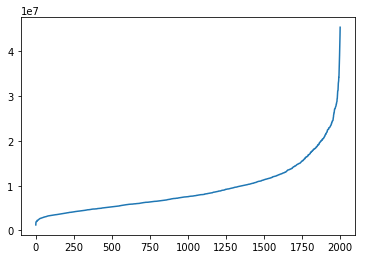

In [31]:
# Original price column in the data.
real_state_task2["price"].plot()

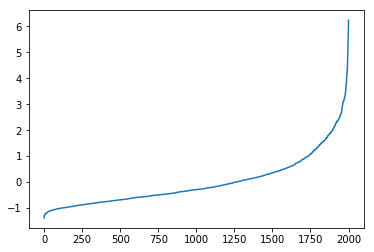

In [32]:
# plotting normalized column
real_state_task2["price_normalized"].plot()

### MinMax Normalisation

In [33]:
minmax_scale = preprocessing.MinMaxScaler().fit(real_state_task2[['price']])
minmax_df = minmax_scale.transform(real_state_task2[['price']])
minmax_df

array([[0.        ],
       [0.0126393 ],
       [0.0156972 ],
       ...,
       [0.90758358],
       [0.95764248],
       [1.        ]])

In [34]:
minA = real_state_task2.price.min()
maxA = real_state_task2.price.max()

print("Min:", minA)
print("Max:", maxA)

Min: 1242000.0
Max: 45390000.0


In [35]:
val = real_state_task2[real_state_task2.price == real_state_task2.price.max()].price
mm = (val - minA) / (maxA - minA)
mm

2000    1.0
Name: price, dtype: float64

In [36]:
print('Min-value after min-max scaling:\nprice = {:.2f}'.format(minmax_df[:,0].min()))
print('\nMax-value after min-max scaling:\nprice = {:.2f}'.format(minmax_df[:,0].max()))

Min-value after min-max scaling:
price = 0.00

Max-value after min-max scaling:
price = 1.00


Comparing attribute price before and after normalization

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCE62BD198>]],
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCE64164E0>]],
       dtype=object))

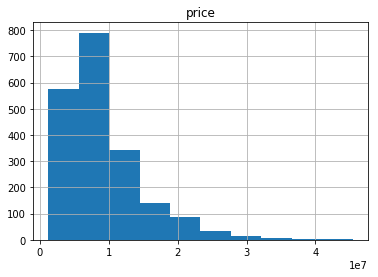

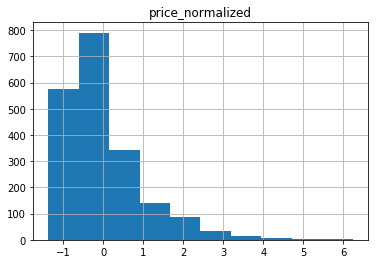

In [37]:
real_state_task2.hist('price'), real_state_task2.hist('price_normalized')

### Transformation

In [38]:
# log transformation
real_state_task2['price_normalized_log'] = None
i = 0
for row in real_state_task2.iterrows():
    real_state_task2['price_normalized_log'].at[i] = math.log(real_state_task2["price"][i])
    i += 1

real_state_task2.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,suburb,year,price_normalized,price_normalized_log
0,1A Tamar Street,1.0,1.0,-37.699029,145.043349,1.0,1242000.0,39917.0,house,BUNDOORA,2016.0,-1.378698,14.0322
1,21 St Vigeons Road,1.0,3.0,-37.707443,145.030426,1.0,1800000.0,34304.0,house,RESERVOIR,2009.0,-1.282476,14.4033
2,2/16 Clive Street,1.0,2.0,-37.934193,145.149216,1.0,1935000.0,78787.0,house,SPRINGVALE,2009.0,-1.259196,14.4756
3,7 Charles Swanston Way,1.0,3.0,-37.884454,144.759958,2.0,1960000.0,9157.0,house,NaN,2015.0,-1.254885,14.4885
4,5 Sussex Street,2.0,3.0,-37.696143,145.078756,1.0,1989000.0,40798.0,house,BUNDOORA,2011.0,-1.249884,14.5031


Comparing attribute price before and after log normalization

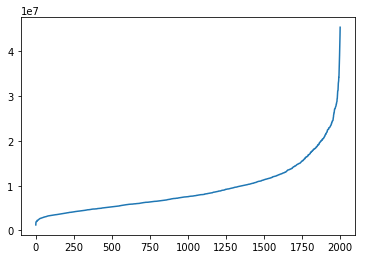

In [39]:
# Original price column in the data.
real_state_task2["price"].plot()

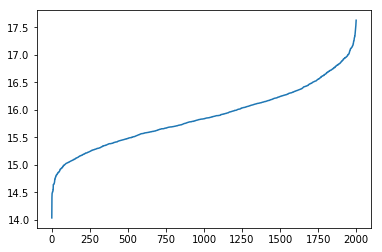

In [40]:
# plotting normalized column
real_state_task2["price_normalized_log"].plot()

### Square power transformation

In [41]:
import math
real_state_task2['price_normalized_sq'] = None
i = 0
for row in real_state_task2.iterrows():
    real_state_task2['price_normalized_sq'].at[i] = math.pow(real_state_task2["price"][i],2)
    i += 1

    
real_state_task2.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,suburb,year,price_normalized,price_normalized_log,price_normalized_sq
0,1A Tamar Street,1.0,1.0,-37.699029,145.043349,1.0,1242000.0,39917.0,house,BUNDOORA,2016.0,-1.378698,14.0322,1.54256e+12
1,21 St Vigeons Road,1.0,3.0,-37.707443,145.030426,1.0,1800000.0,34304.0,house,RESERVOIR,2009.0,-1.282476,14.4033,3.24e+12
2,2/16 Clive Street,1.0,2.0,-37.934193,145.149216,1.0,1935000.0,78787.0,house,SPRINGVALE,2009.0,-1.259196,14.4756,3.74422e+12
3,7 Charles Swanston Way,1.0,3.0,-37.884454,144.759958,2.0,1960000.0,9157.0,house,NaN,2015.0,-1.254885,14.4885,3.8416e+12
4,5 Sussex Street,2.0,3.0,-37.696143,145.078756,1.0,1989000.0,40798.0,house,BUNDOORA,2011.0,-1.249884,14.5031,3.95612e+12


Comparing attribute price before and after square normalization

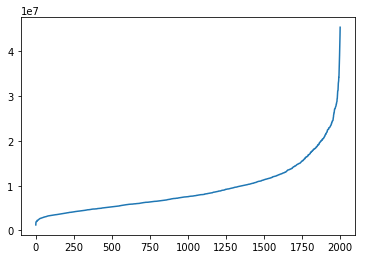

In [42]:
# Original price column in the data.
real_state_task2["price"].plot()

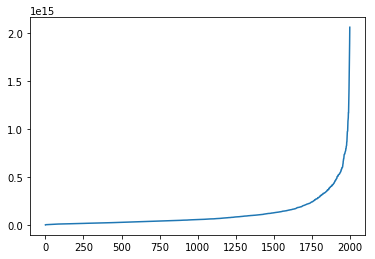

In [43]:
# plotting normalized column
real_state_task2["price_normalized_sq"].plot()

### Root Transformation

In [44]:
import math
real_state_task2['price_normalized_root'] = None
i = 0
for row in real_state_task2.iterrows():
    real_state_task2['price_normalized_root'].at[i] = math.sqrt(real_state_task2["price"][i])
    i += 1

real_state_task2.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,suburb,year,price_normalized,price_normalized_log,price_normalized_sq,price_normalized_root
0,1A Tamar Street,1.0,1.0,-37.699029,145.043349,1.0,1242000.0,39917.0,house,BUNDOORA,2016.0,-1.378698,14.0322,1.54256e+12,1114.45
1,21 St Vigeons Road,1.0,3.0,-37.707443,145.030426,1.0,1800000.0,34304.0,house,RESERVOIR,2009.0,-1.282476,14.4033,3.24e+12,1341.64
2,2/16 Clive Street,1.0,2.0,-37.934193,145.149216,1.0,1935000.0,78787.0,house,SPRINGVALE,2009.0,-1.259196,14.4756,3.74422e+12,1391.04
3,7 Charles Swanston Way,1.0,3.0,-37.884454,144.759958,2.0,1960000.0,9157.0,house,NaN,2015.0,-1.254885,14.4885,3.8416e+12,1400
4,5 Sussex Street,2.0,3.0,-37.696143,145.078756,1.0,1989000.0,40798.0,house,BUNDOORA,2011.0,-1.249884,14.5031,3.95612e+12,1410.32


Comparing attribute price before and after root normalization

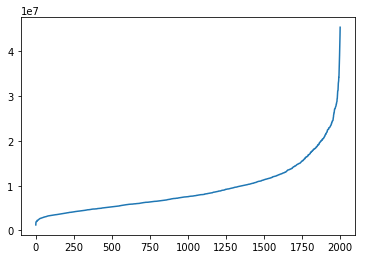

In [45]:
# Original price column in the data.
real_state_task2["price"].plot()

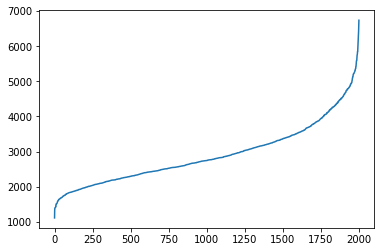

In [46]:
# plotting normalized column
real_state_task2["price_normalized_root"].plot()

In [47]:
real_state_task2[['price_normalized_log','price_normalized_sq','price_normalized_root']] = real_state_task2[['price_normalized_log','price_normalized_sq','price_normalized_root']].astype(float)

### Plot and see trend of data

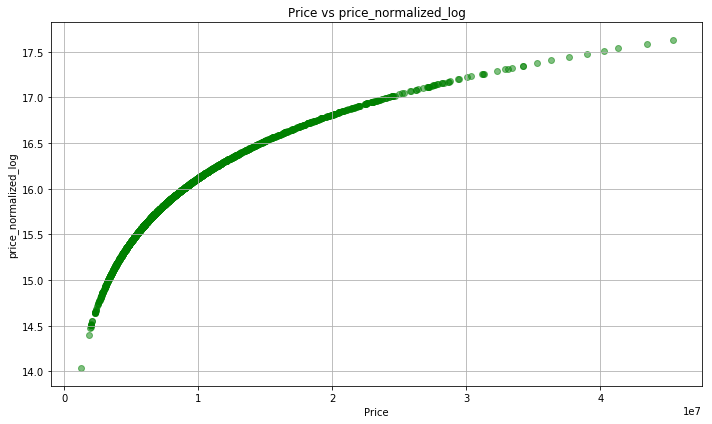

In [48]:
f = plt.figure(figsize=(10,6))
plt.scatter(real_state_task2['price'], 
            real_state_task2['price_normalized_log'],
            color='green',             
            alpha=0.5)
plt.title('Price vs price_normalized_log')
plt.xlabel('Price')
plt.ylabel('price_normalized_log')
plt.grid()
plt.tight_layout()
plt.show()

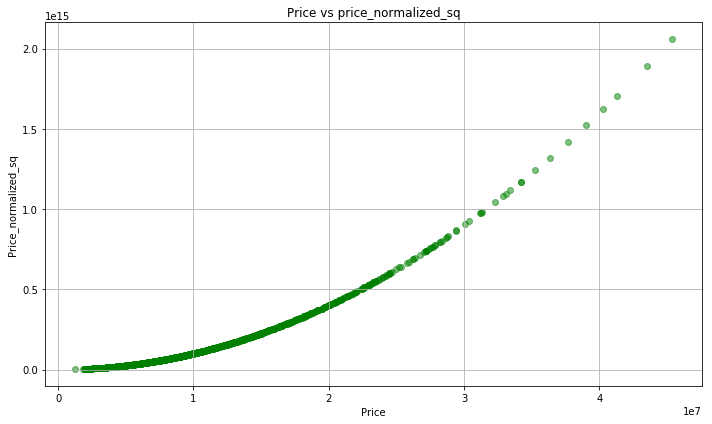

In [49]:
f = plt.figure(figsize=(10,6))
plt.scatter(real_state_task2['price'], 
            real_state_task2['price_normalized_sq'],
            color='green', 
            alpha=0.5)
plt.title('Price vs price_normalized_sq')
plt.xlabel('Price')
plt.ylabel('Price_normalized_sq')
plt.grid()
plt.tight_layout()
plt.show()

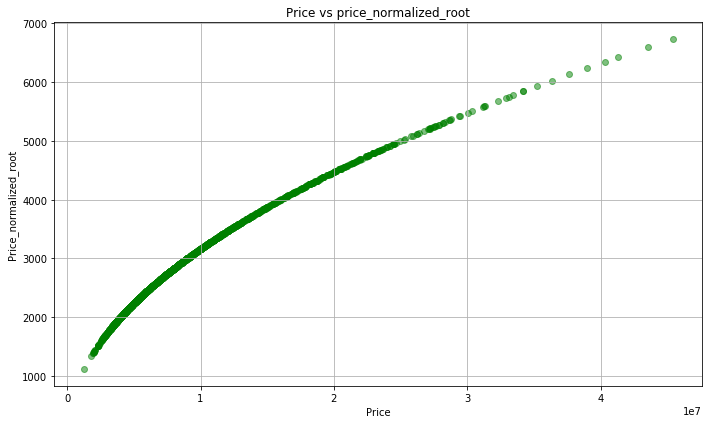

In [50]:
f = plt.figure(figsize=(10,6))
plt.scatter(real_state_task2['price'], 
            real_state_task2['price_normalized_root'],
            color='green', 
            label='input scale', 
            alpha=0.5)
plt.title('Price vs price_normalized_root')
plt.xlabel('Price')
plt.ylabel('Price_normalized_root')
plt.grid()
plt.tight_layout()
plt.show()

### Linear Model

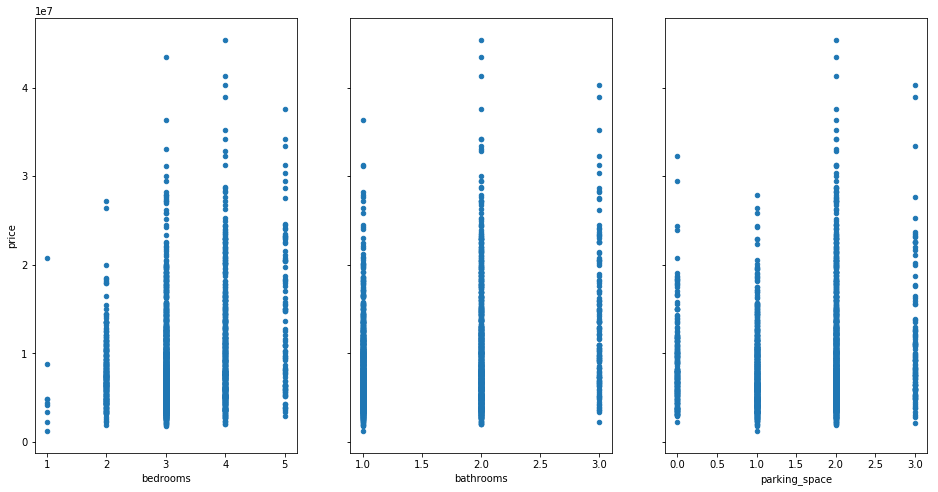

In [51]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
real_state_task2.plot(kind='scatter', x='bedrooms', y='price', ax=axs[0], figsize=(16, 8))
real_state_task2.plot(kind='scatter', x='bathrooms', y='price', ax=axs[1])
real_state_task2.plot(kind='scatter', x='parking_space', y='price', ax=axs[2])

In [52]:
real_state_task2["property_type"] = 1
x=real_state_task2[real_state_task2.columns[[1,2,5,8]]]
y=real_state_task2["price"]
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 1)
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))

model =sm.OLS(y,x).fit()
predict=model.predict(x)
model_summary=model.summary()
print(model_summary)

0.06736787464298988
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     60.95
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           1.05e-37
Time:                        23:33:31   Log-Likelihood:                -33914.
No. Observations:                2001   AIC:                         6.784e+04
Df Residuals:                    1997   BIC:                         6.786e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms       1.65e+06  

In [53]:
real_state_task2["property_type"] = 1
x=real_state_task2[real_state_task2.columns[[1,2,5,8]]]
y=real_state_task2["price_normalized"]
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 1)
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))

model =sm.OLS(y,x).fit()
predict=model.predict(x)
model_summary=model.summary()
print(model_summary)

0.06736787464298977
                            OLS Regression Results                            
Dep. Variable:       price_normalized   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     60.95
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           1.05e-37
Time:                        23:33:31   Log-Likelihood:                -2751.6
No. Observations:                2001   AIC:                             5511.
Df Residuals:                    1997   BIC:                             5534.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms         0.2846  

In [54]:
real_state_task2["property_type"] = 1
x=real_state_task2[real_state_task2.columns[[1,2,5,8]]]
y=real_state_task2["price_normalized_log"]
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 1)
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))

model =sm.OLS(y,x).fit()
predict=model.predict(x)
model_summary=model.summary()
print(model_summary)

0.04794688511279832
                             OLS Regression Results                             
Dep. Variable:     price_normalized_log   R-squared:                       0.067
Model:                              OLS   Adj. R-squared:                  0.066
Method:                   Least Squares   F-statistic:                     47.87
Date:                  Fri, 26 Oct 2018   Prob (F-statistic):           7.18e-30
Time:                          23:33:31   Log-Likelihood:                -1599.8
No. Observations:                  2001   AIC:                             3208.
Df Residuals:                      1997   BIC:                             3230.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathro

In [55]:
real_state_task2["property_type"] = 1
x=real_state_task2[real_state_task2.columns[[1,2,5,8]]]
y=real_state_task2["price_normalized_sq"]
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 1)
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))

model =sm.OLS(y,x).fit()
predict=model.predict(x)
model_summary=model.summary()
print(model_summary)

0.06554974783226664
                             OLS Regression Results                            
Dep. Variable:     price_normalized_sq   R-squared:                       0.076
Model:                             OLS   Adj. R-squared:                  0.075
Method:                  Least Squares   F-statistic:                     54.73
Date:                 Fri, 26 Oct 2018   Prob (F-statistic):           5.42e-34
Time:                         23:33:31   Log-Likelihood:                -68438.
No. Observations:                 2001   AIC:                         1.369e+05
Df Residuals:                     1997   BIC:                         1.369e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms      4

In [56]:
real_state_task2["property_type"] = 1
x=real_state_task2[real_state_task2.columns[[1,2,5,8]]]
y=real_state_task2["price_normalized_root"]
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 1)
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))

model =sm.OLS(y,x).fit()
predict=model.predict(x)
model_summary=model.summary()
print(model_summary)

0.059931702219395706
                              OLS Regression Results                             
Dep. Variable:     price_normalized_root   R-squared:                       0.078
Model:                               OLS   Adj. R-squared:                  0.077
Method:                    Least Squares   F-statistic:                     56.44
Date:                   Fri, 26 Oct 2018   Prob (F-statistic):           5.13e-35
Time:                           23:33:31   Log-Likelihood:                -16262.
No. Observations:                   2001   AIC:                         3.253e+04
Df Residuals:                       1997   BIC:                         3.255e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------